# 1. Analyse exploratoire des données : 

In [1]:
import pandas as pd

# Fonction pour charger les données avec gestion automatique des encodages
def load_data_with_encoding(file_path):
    encodings = ['utf-8', 'ISO-8859-1', 'latin1']
    for enc in encodings:
        try:
            df = pd.read_csv(file_path, encoding=enc, na_values=['?', '', ' ', '-1'])
            print(f"Chargement réussi avec l'encodage : {enc}")
            return df
        except UnicodeDecodeError:
            continue
    raise ValueError(f"Impossible de charger le fichier {file_path} avec les encodages testés.")

# Charger chaque fichier
catalogue = load_data_with_encoding('Catalogue.csv')
clients = load_data_with_encoding('Clients.csv')
immatriculations = load_data_with_encoding('Immatriculations_small.csv')
marketing = load_data_with_encoding('Marketing.csv')

# Fonction pour nettoyer les données
def clean_data(df):
    # Identifier les colonnes numériques et catégoriques
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    # Gestion des valeurs manquantes
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())  # Remplacer par la médiane pour les colonnes numériques
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])  # Remplacer par le mode pour les colonnes catégoriques

    # Nettoyage spécifique pour la colonne "sexe" si elle existe
    if 'sexe' in df.columns:
        df['sexe'] = df['sexe'].str.lower()  # Mettre en minuscule
        df['sexe'] = df['sexe'].replace({'homme': 'M', 'h': 'M', 'femme': 'F', 'f': 'F'})
        df['sexe'] = df['sexe'].fillna('N/A')  # Remplir les valeurs manquantes avec "N/A"
    return df

# Nettoyer chaque dataset
catalogue_clean = clean_data(catalogue)
clients_clean = clean_data(clients)
immatriculations_clean = clean_data(immatriculations)
marketing_clean = clean_data(marketing)

# Afficher un aperçu des données nettoyées
print("Catalogue Cleaned:\n", catalogue_clean.head())
print("\nClients Cleaned:\n", clients_clean.head())
print("\nImmatriculations Cleaned:\n", immatriculations_clean.head())
print("\nMarketing Cleaned:\n", marketing_clean.head())

Chargement réussi avec l'encodage : ISO-8859-1
Chargement réussi avec l'encodage : ISO-8859-1
Chargement réussi avec l'encodage : utf-8
Chargement réussi avec l'encodage : ISO-8859-1
Catalogue Cleaned:
   marque     nom  puissance     longueur  nbPlaces  nbPortes couleur  \
0  Volvo  S80 T6        272  très longue         5         5   blanc   
1  Volvo  S80 T6        272  très longue         5         5    noir   
2  Volvo  S80 T6        272  très longue         5         5   rouge   
3  Volvo  S80 T6        272  très longue         5         5    gris   
4  Volvo  S80 T6        272  très longue         5         5    bleu   

   occasion   prix  
0     False  50500  
1     False  50500  
2     False  50500  
3      True  35350  
4      True  35350  

Clients Cleaned:
     age sexe   taux situationFamiliale  nbEnfantsAcharge  2eme voiture  \
0  25.0    F  159.0          En Couple               2.0         False   
1  53.0    m  594.0          En Couple               2.0         False 

Analyse des distributions pour Clients:


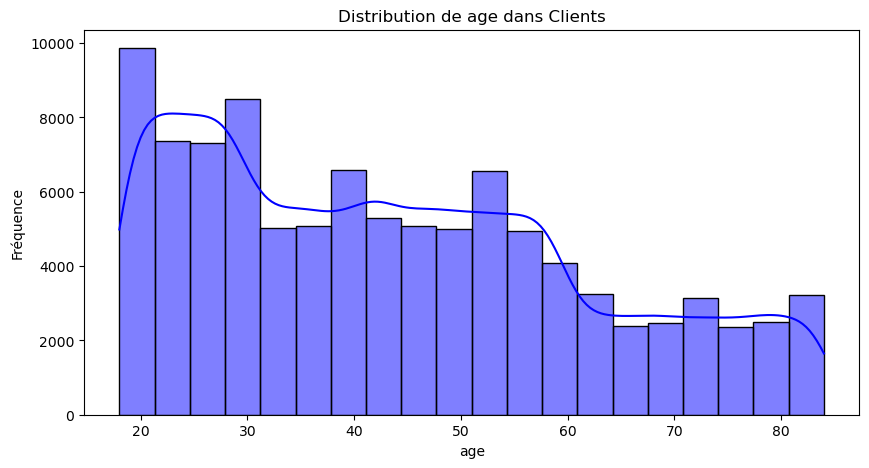

Analyse des distributions pour Catalogue:


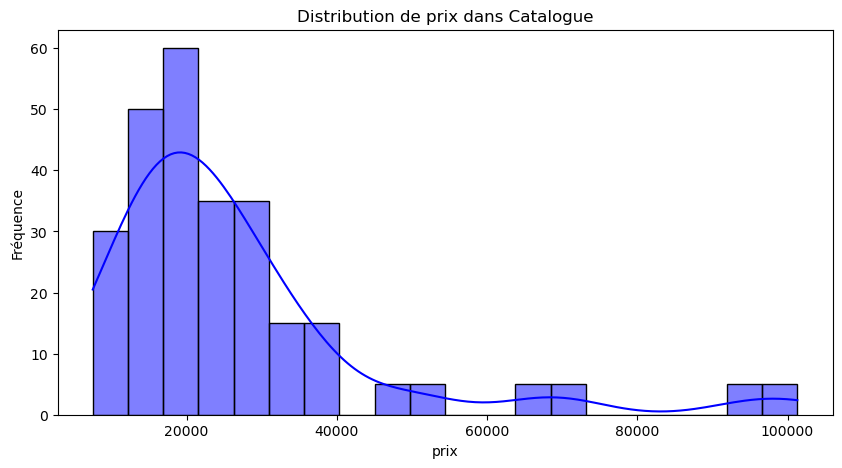

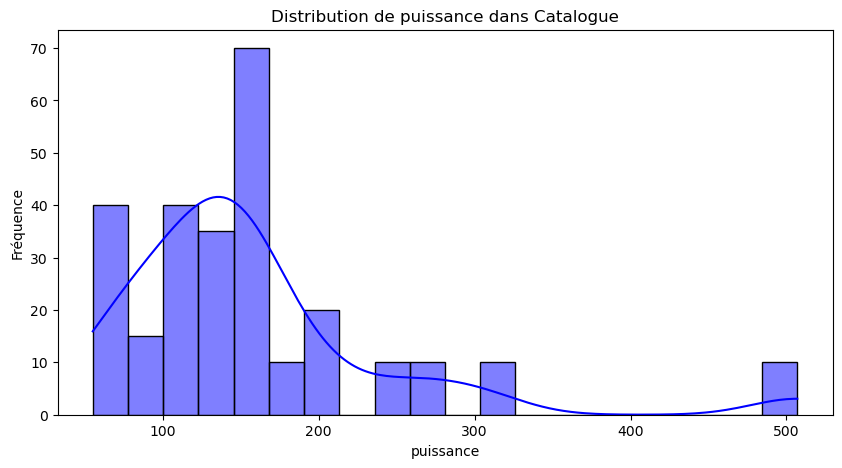

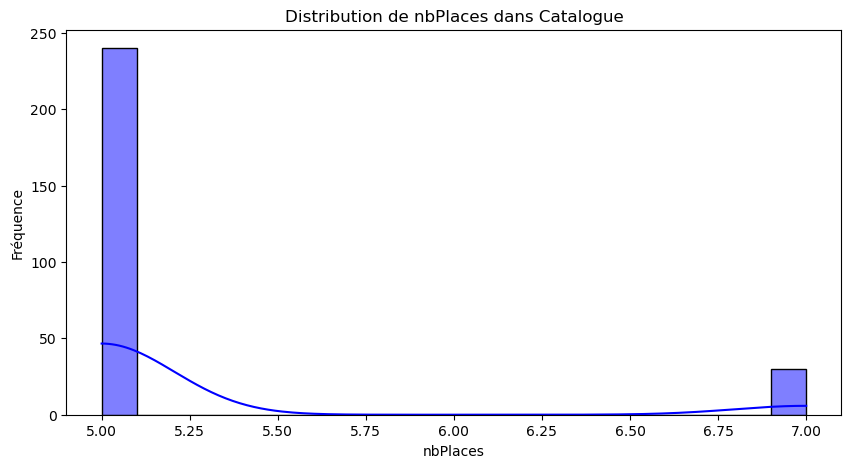

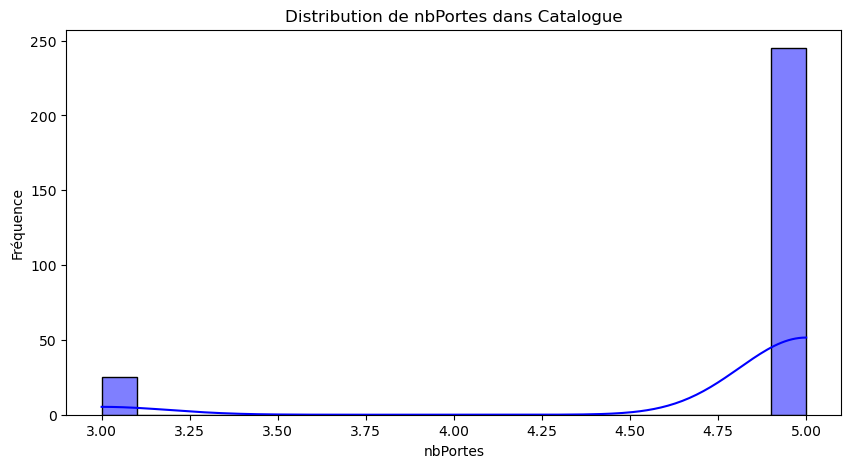

Analyse des distributions pour Immatriculations:


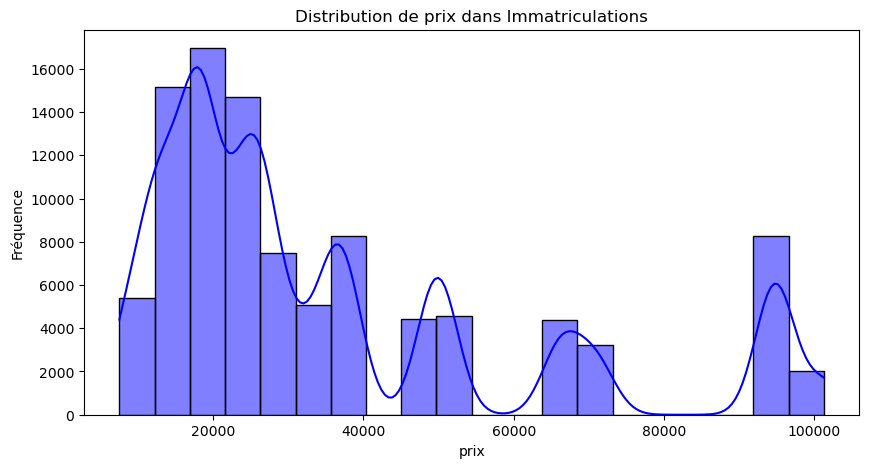

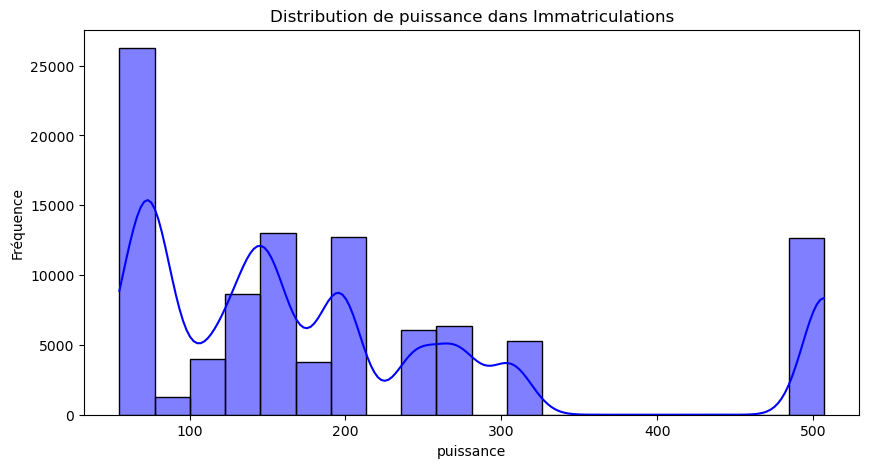

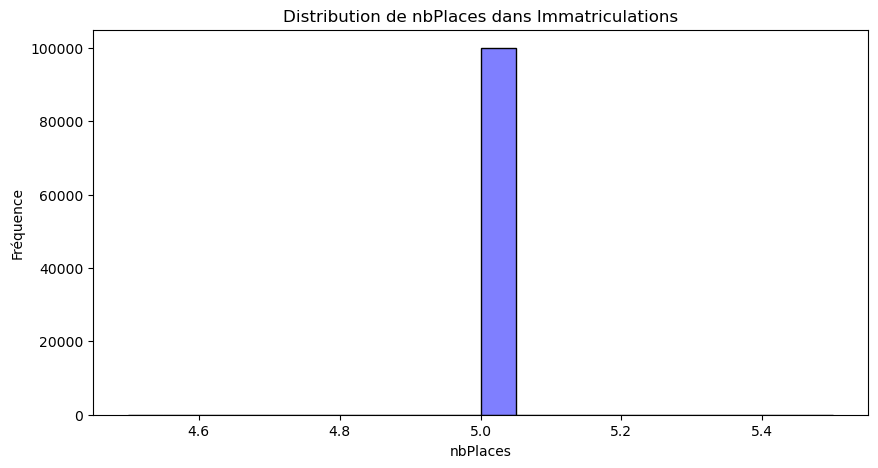

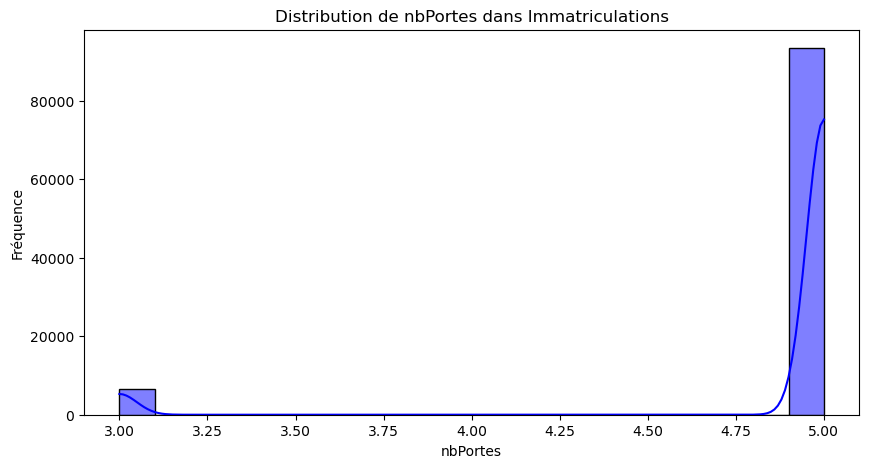

Analyse des distributions pour Marketing:


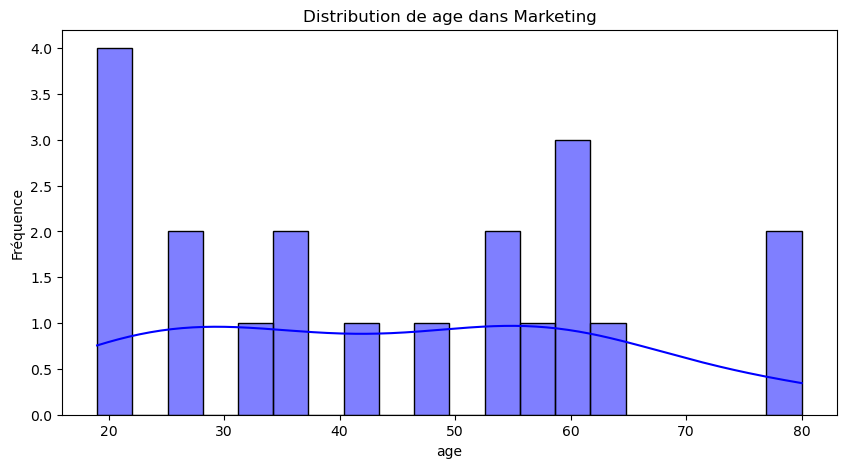

Boxplots pour Clients:


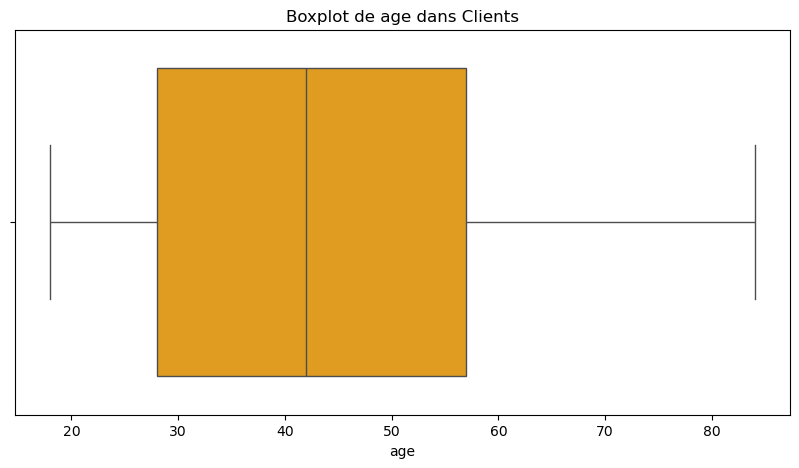

Boxplots pour Catalogue:


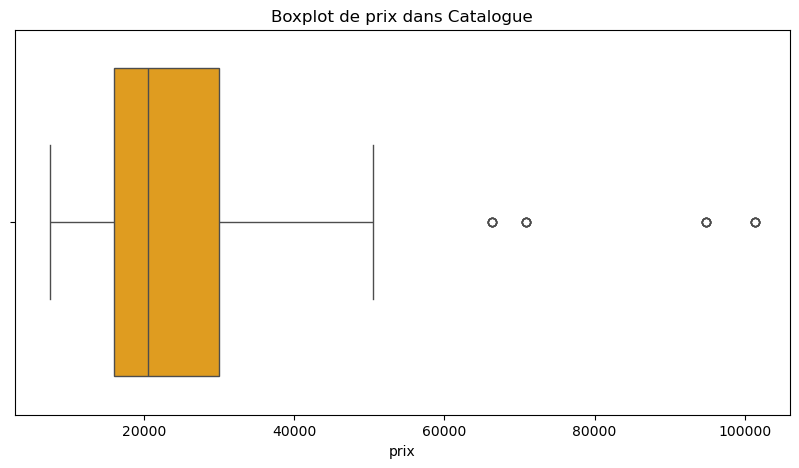

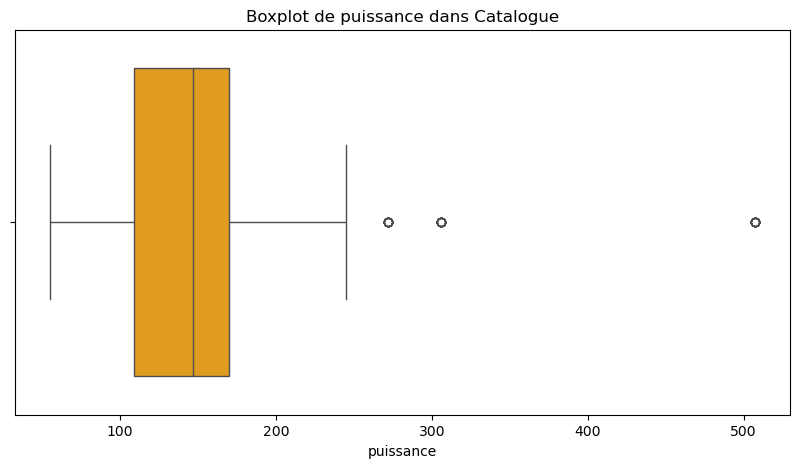

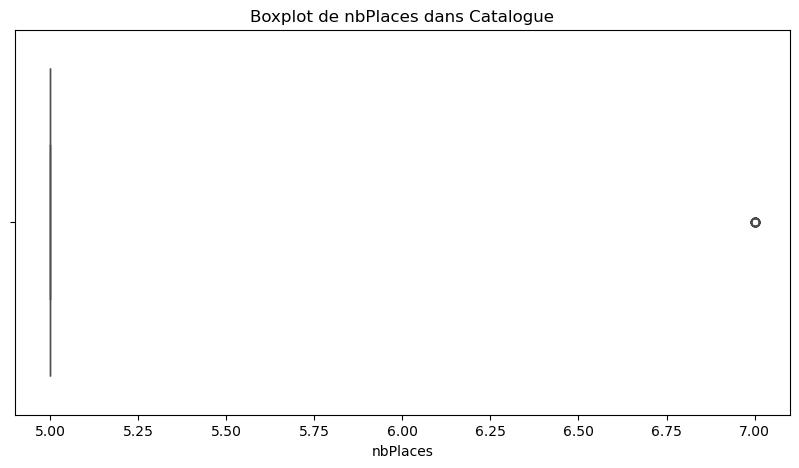

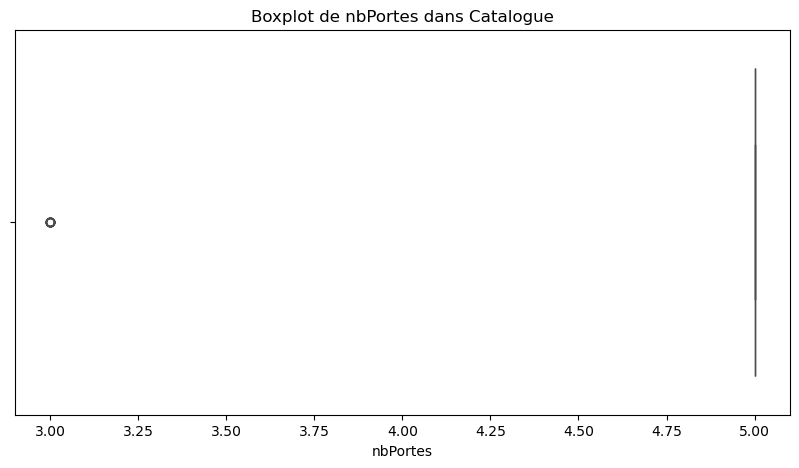

Boxplots pour Immatriculations:


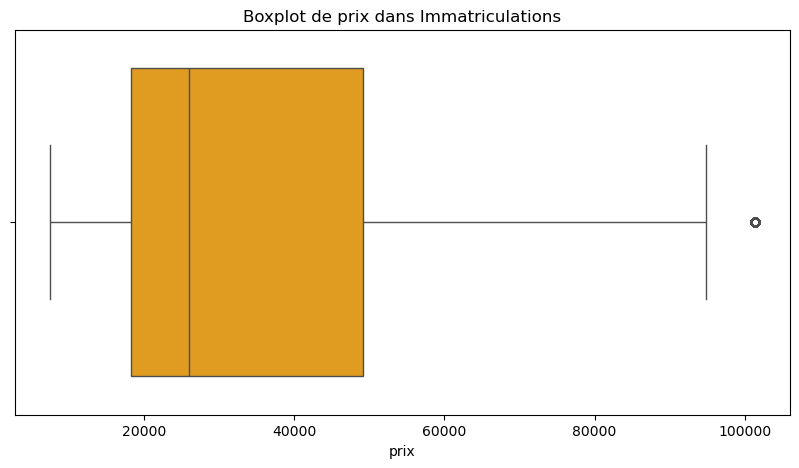

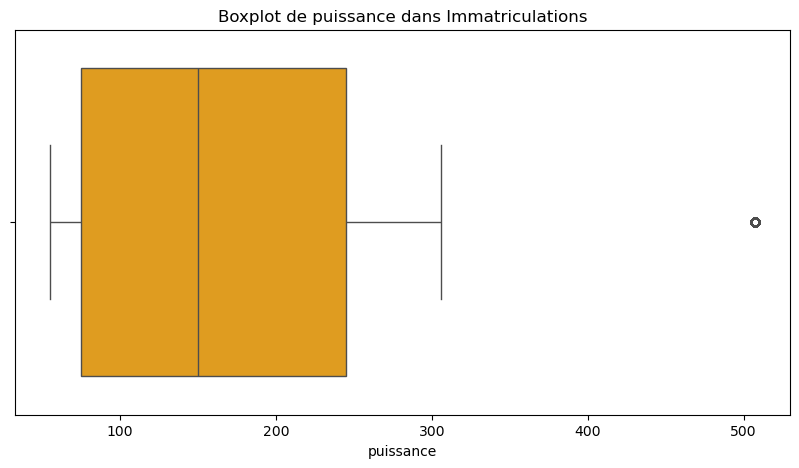

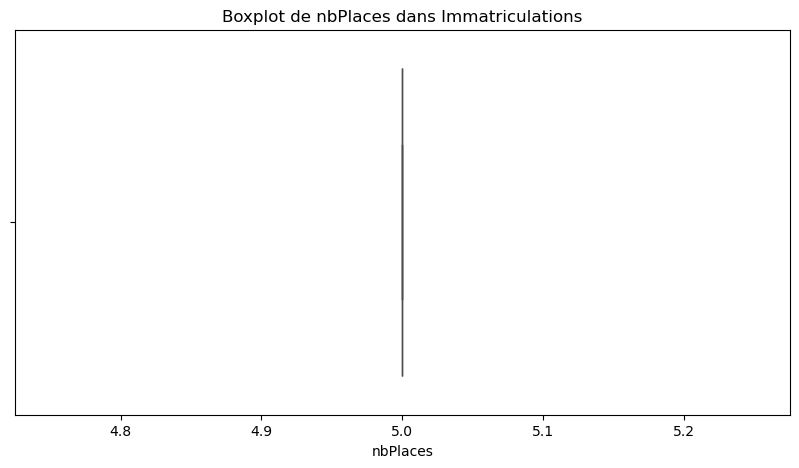

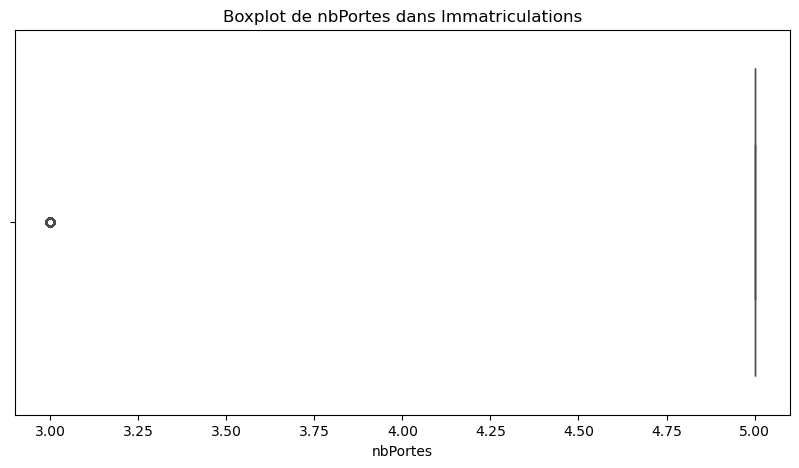

Boxplots pour Marketing:


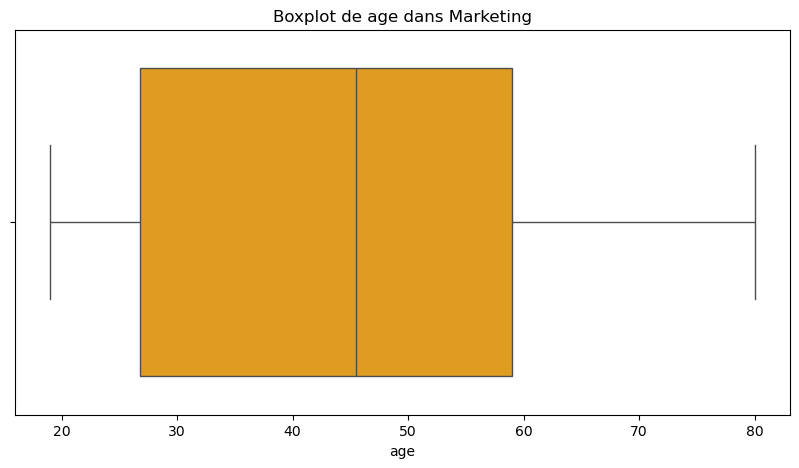

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Étape 1 : Transformation des données
def transform_data(df):
    # Label Encoding pour les colonnes ordinales
    if 'longueur' in df.columns:
        longueur_mapping = {'très courte': 1, 'courte': 2, 'moyenne': 3, 'longue': 4, 'très longue': 5}
        df['longueur'] = df['longueur'].replace(longueur_mapping)
    
    # One-Hot Encoding pour les colonnes non ordinales
    if 'situationFamiliale' in df.columns:
        df = pd.get_dummies(df, columns=['situationFamiliale'], drop_first=True)
    
    return df

# Transformation sur les datasets
catalogue_transformed = transform_data(catalogue_clean)
clients_transformed = transform_data(clients_clean)
immatriculations_transformed = transform_data(immatriculations_clean)
marketing_transformed = transform_data(marketing_clean)

# Étape 2 : Visualisation des distributions
def plot_distributions(df, columns, dataset_name):
    print(f"Analyse des distributions pour {dataset_name}:")
    for col in columns:
        if col in df.columns:
            plt.figure(figsize=(10, 5))
            sns.histplot(df[col], kde=True, bins=20, color='blue')
            plt.title(f"Distribution de {col} dans {dataset_name}")
            plt.xlabel(col)
            plt.ylabel("Fréquence")
            plt.show()

# Analyse des colonnes numériques communes
numeric_columns = ['age', 'prix', 'puissance', 'nbPlaces', 'nbPortes']

plot_distributions(clients_transformed, numeric_columns, "Clients")
plot_distributions(catalogue_transformed, numeric_columns, "Catalogue")
plot_distributions(immatriculations_transformed, numeric_columns, "Immatriculations")
plot_distributions(marketing_transformed, numeric_columns, "Marketing")

# Détection des anomalies avec des boxplots
def plot_boxplots(df, columns, dataset_name):
    print(f"Boxplots pour {dataset_name}:")
    for col in columns:
        if col in df.columns:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=df[col], color='orange')
            plt.title(f"Boxplot de {col} dans {dataset_name}")
            plt.xlabel(col)
            plt.show()

plot_boxplots(clients_transformed, numeric_columns, "Clients")
plot_boxplots(catalogue_transformed, numeric_columns, "Catalogue")
plot_boxplots(immatriculations_transformed, numeric_columns, "Immatriculations")
plot_boxplots(marketing_transformed, numeric_columns, "Marketing")

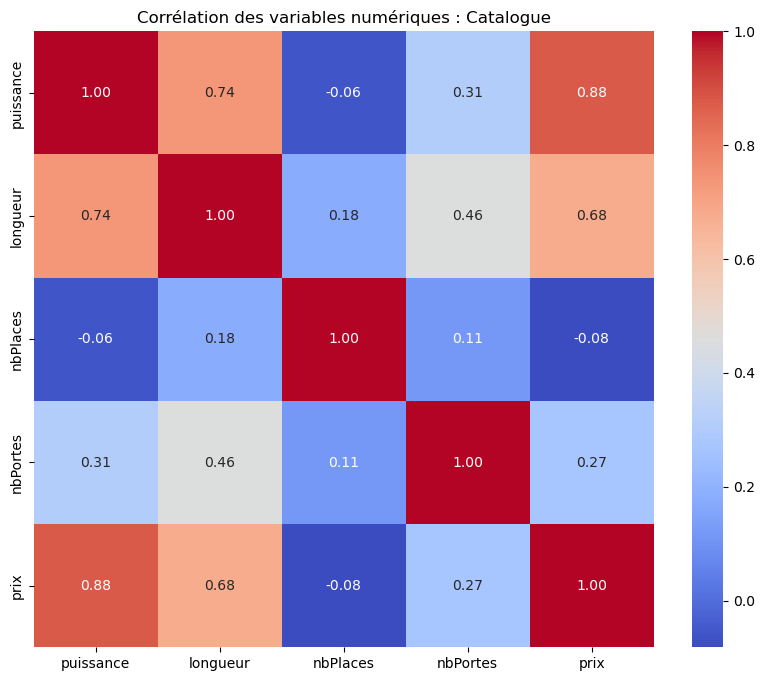

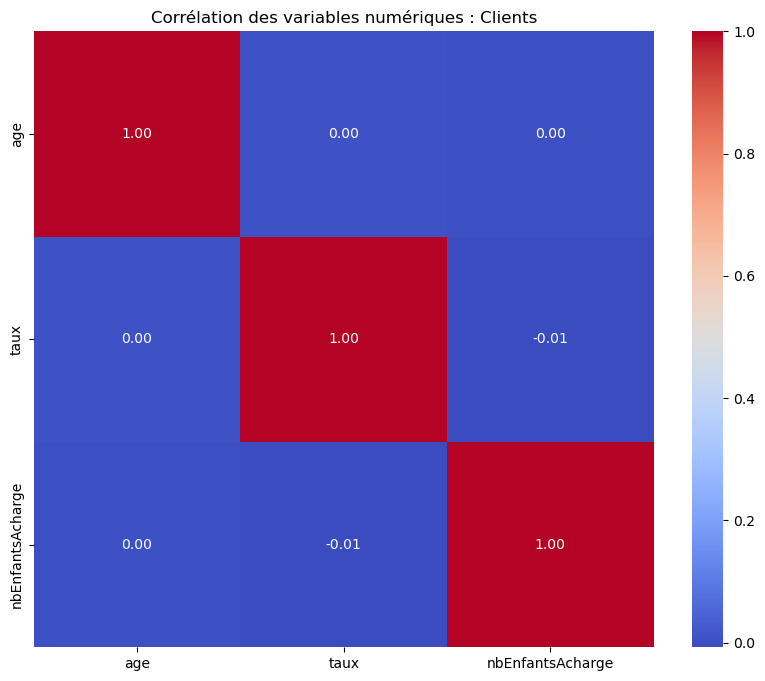

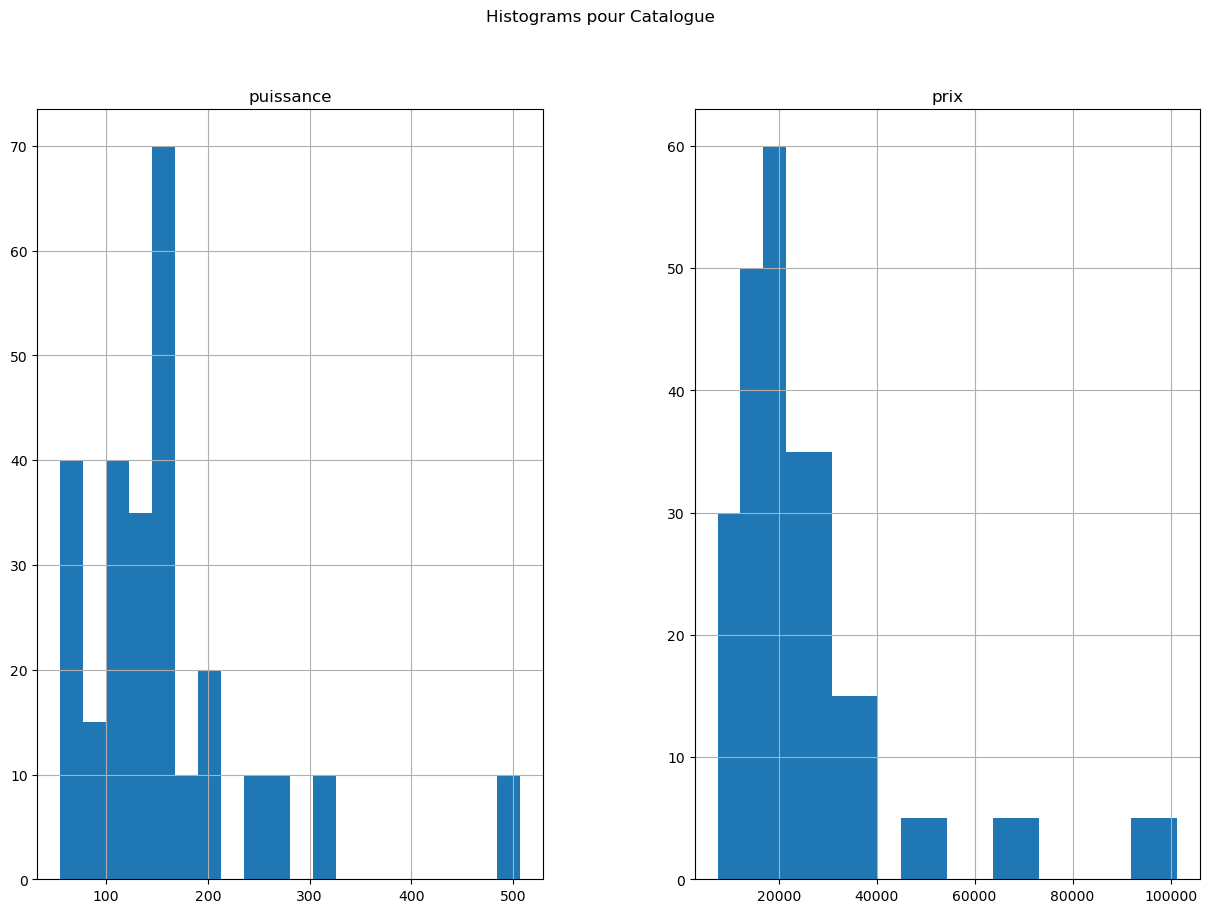

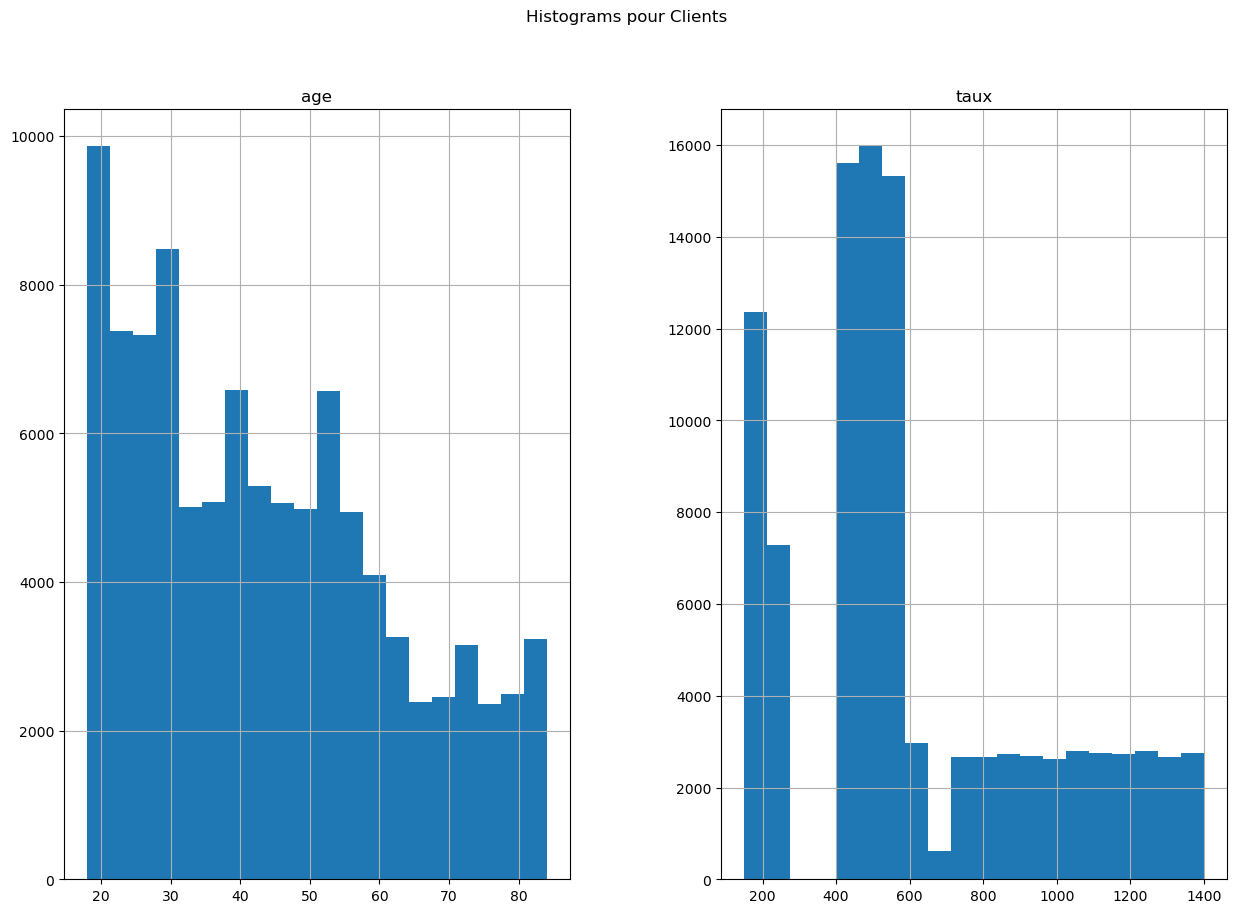

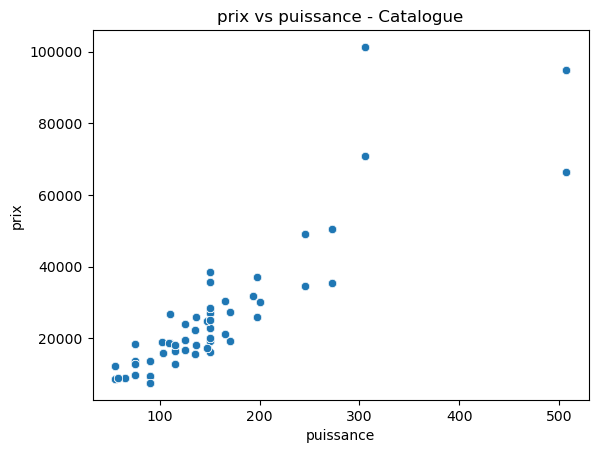

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrélations pour les variables numériques
def plot_correlation_matrix(df, name):
    corr = df.select_dtypes(include=['float64', 'int64']).corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Corrélation des variables numériques : {name}")
    plt.show()

plot_correlation_matrix(catalogue_clean, "Catalogue")
plot_correlation_matrix(clients_clean, "Clients")

# Distribution des variables clés
def plot_histograms(df, columns, name):
    df[columns].hist(bins=20, figsize=(15, 10))
    plt.suptitle(f"Histograms pour {name}")
    plt.show()

plot_histograms(catalogue_clean, ['puissance', 'prix'], "Catalogue")
plot_histograms(clients_clean, ['age', 'taux'], "Clients")

# Nuages de points
def scatter_plot(df, x, y, name):
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f"{y} vs {x} - {name}")
    plt.show()

scatter_plot(catalogue_clean, 'puissance', 'prix', "Catalogue")

# 2. Identification des catégories de véhicules :

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Suppose 'catalogue_clean' is the dataframe containing vehicle data

# Preprocessing: Standardize the numeric columns
numeric_columns = ['puissance', 'prix', 'longueur']  # Example numeric columns, adjust as needed
scaler = StandardScaler()
catalogue_clean[numeric_columns] = scaler.fit_transform(catalogue_clean[numeric_columns])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
catalogue_clean['cluster'] = kmeans.fit_predict(catalogue_clean[numeric_columns])

# Identifier le cluster avec les moyennes les plus élevées et les attribuer dynamiquement
cluster_means = catalogue_clean.groupby('cluster')[numeric_columns].mean()

# Trouver les indices des clusters par ordre de puissance moyenne
clusters_sorted_by_power = cluster_means.sort_values(by='puissance').index

# Mapping dynamique des clusters
cluster_to_category = {
    clusters_sorted_by_power[0]: 'Citadine',  # Plus faible puissance moyenne
    clusters_sorted_by_power[1]: 'Routière',  # Puissance moyenne intermédiaire
    clusters_sorted_by_power[2]: 'Sportive'   # Plus forte puissance moyenne
}

# Appliquer le mapping
catalogue_clean['categorie'] = catalogue_clean['cluster'].map(cluster_to_category)

# Résultat final
print("\nCatalogue avec catégories de véhicules :")
print(catalogue_clean[['marque', 'nom', 'puissance', 'prix', 'longueur', 'categorie']])

C:\Users\21263\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\21263\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\21263\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\21263\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp


Catalogue avec catégories de véhicules :
    marque     nom  puissance      prix  longueur categorie
0    Volvo  S80 T6   1.265800  1.253336  1.471814  Routière
1    Volvo  S80 T6   1.265800  1.253336  1.471814  Routière
2    Volvo  S80 T6   1.265800  1.253336  1.471814  Routière
3    Volvo  S80 T6   1.265800  0.456589  1.471814  Routière
4    Volvo  S80 T6   1.265800  0.456589  1.471814  Routière
..     ...     ...        ...       ...       ...       ...
265   Audi  A2 1.4  -0.913802 -0.439555 -1.435916  Citadine
266   Audi  A2 1.4  -0.913802 -0.439555 -1.435916  Citadine
267   Audi  A2 1.4  -0.913802 -0.728435 -1.435916  Citadine
268   Audi  A2 1.4  -0.913802 -0.728435 -1.435916  Citadine
269   Audi  A2 1.4  -0.913802 -0.439555 -1.435916  Citadine

[270 rows x 6 columns]


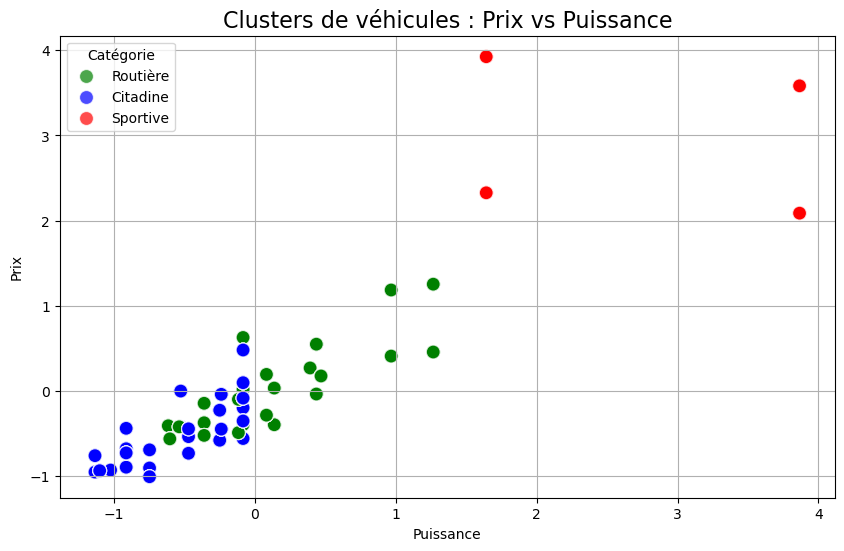

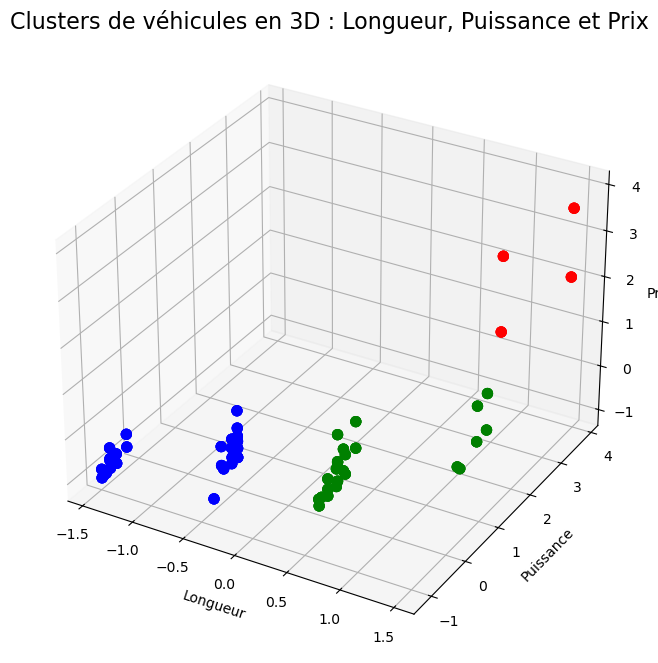

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapper les catégories à des couleurs
cluster_to_color = {'Citadine': 'blue', 'Routière': 'green', 'Sportive': 'red'}
catalogue_clean['color'] = catalogue_clean['categorie'].map(cluster_to_color)

# Graphique 2D : Prix vs Puissance
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=catalogue_clean, 
    x='puissance', 
    y='prix', 
    hue='categorie', 
    palette=cluster_to_color, 
    s=100, 
    alpha=0.7
)
plt.title('Clusters de véhicules : Prix vs Puissance', fontsize=16)
plt.xlabel('Puissance')
plt.ylabel('Prix')
plt.legend(title='Catégorie')
plt.grid(True)
plt.show()

# Graphique 3D : Longueur, Prix, Puissance
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = catalogue_clean['color']
ax.scatter(
    catalogue_clean['longueur'], 
    catalogue_clean['puissance'], 
    catalogue_clean['prix'], 
    c=colors, 
    s=50, 
    alpha=0.8
)

ax.set_title('Clusters de véhicules en 3D : Longueur, Puissance et Prix', fontsize=16)
ax.set_xlabel('Longueur')
ax.set_ylabel('Puissance')
ax.set_zlabel('Prix')
plt.show()

# 3. Application des catégories de véhicules définies aux données des Immatriculations : 

In [6]:
# Mapper les catégories depuis catalogue_clean
immatriculations = pd.merge(
    immatriculations, 
    catalogue_clean[['marque', 'nom', 'categorie']], 
    on=['marque', 'nom'], 
    how='left'
)

# Vérification
print("Immatriculations avec catégories :")
immatriculations.head()

Immatriculations avec catégories :


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,categorie
0,3467 SB 72,Seat,Toledo 1.6,102,4,5,5,bleu,False,18880,Routière
1,3467 SB 72,Seat,Toledo 1.6,102,4,5,5,bleu,False,18880,Routière
2,3467 SB 72,Seat,Toledo 1.6,102,4,5,5,bleu,False,18880,Routière
3,3467 SB 72,Seat,Toledo 1.6,102,4,5,5,bleu,False,18880,Routière
4,3467 SB 72,Seat,Toledo 1.6,102,4,5,5,bleu,False,18880,Routière


# 4. Fusion des données Clients et Immatriculations :

In [7]:
# Fusion des données
fusion_df = pd.merge(clients, immatriculations, on='immatriculation', how='inner')

# Vérification du résultat
print("Données fusionnées avec catégories :")
print(fusion_df.head())

# Exporter si nécessaire
fusion_df.to_csv('fusion_clients_immatriculations.csv', index=False)

Données fusionnées avec catégories :
    age sexe   taux situationFamiliale  nbEnfantsAcharge  2eme voiture  \
0  25.0    F  159.0          En Couple               2.0         False   
1  25.0    F  159.0          En Couple               2.0         False   
2  25.0    F  159.0          En Couple               2.0         False   
3  25.0    F  159.0          En Couple               2.0         False   
4  25.0    F  159.0          En Couple               2.0         False   

  immatriculation marque         nom  puissance  longueur  nbPlaces  nbPortes  \
0      3467 SB 72   Seat  Toledo 1.6        102         4         5         5   
1      3467 SB 72   Seat  Toledo 1.6        102         4         5         5   
2      3467 SB 72   Seat  Toledo 1.6        102         4         5         5   
3      3467 SB 72   Seat  Toledo 1.6        102         4         5         5   
4      3467 SB 72   Seat  Toledo 1.6        102         4         5         5   

  couleur  occasion   prix cate

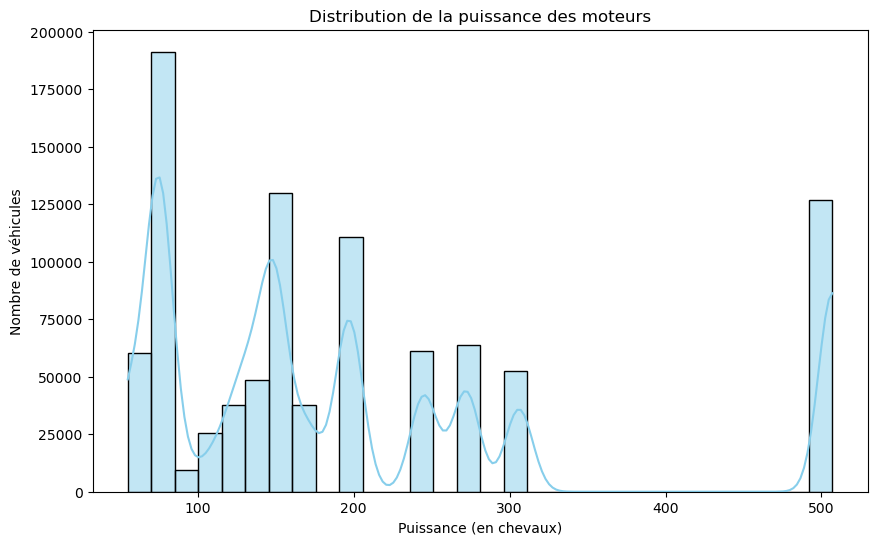

C:\Users\21263\AppData\Local\Temp\ipykernel_15048\2065413392.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prix_moyen_par_situation.index, y=prix_moyen_par_situation.values, palette="viridis")


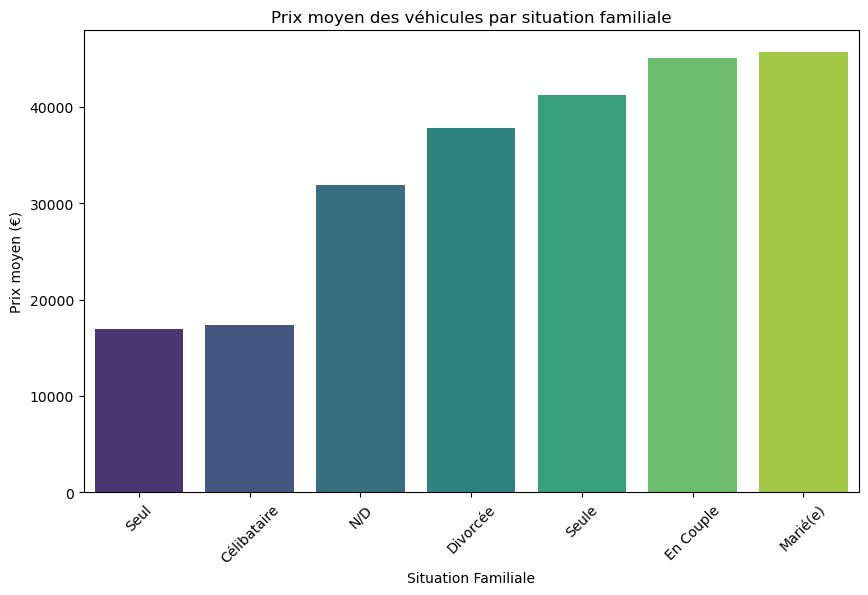

Prix moyen par type de véhicule :
nom
1007 1.4            12800.757108
120i                25060.000000
9.3 1.8T            31357.767398
A2 1.4              16844.353028
A200                20998.713911
A3 2.0 FSI          25037.250000
Almera 1.8          16450.000000
Copper 1.6 16V      15715.733662
Croma 2.2           22649.285564
Cuore 1.0            8850.000000
Golf 2.0 FSI        21073.993926
Laguna 2.0T         25002.646593
Logan 1.6 MPI        7500.000000
M5                  84953.829384
Maxima 3.0 V6       30000.000000
Megane 2.0 16V      20585.814208
Mondeo 1.8          21896.281847
New Beatle 1.8      22612.674286
Picanto 1.1          8990.000000
Polo 1.2 6V         11384.501331
Primera 1.6         18650.000000
S500                82567.784329
S80 T6              46264.848532
Superb 2.8 V6       31790.000000
Toledo 1.6          18880.000000
Vel Satis 3.5 V6    45138.702065
X-Type 2.5 V6       33868.176027
Ypsilon 1.4 16V     11788.926746
Name: prix, dtype: float64

Prix moyen

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données fusionnées
fusion_df = pd.read_csv("fusion_clients_immatriculations.csv")

# Analyse statistique
# Moyenne des prix par type de véhicule
prix_moyen_par_vehicule = fusion_df.groupby("nom")["prix"].mean()

# Distribution de la puissance des moteurs
plt.figure(figsize=(10, 6))
sns.histplot(fusion_df["puissance"], bins=30, kde=True, color='skyblue')
plt.title("Distribution de la puissance des moteurs")
plt.xlabel("Puissance (en chevaux)")
plt.ylabel("Nombre de véhicules")
plt.show()

# Visualisation : Prix moyen des véhicules par situation familiale
prix_moyen_par_situation = fusion_df.groupby("situationFamiliale")["prix"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=prix_moyen_par_situation.index, y=prix_moyen_par_situation.values, palette="viridis")
plt.title("Prix moyen des véhicules par situation familiale")
plt.xlabel("Situation Familiale")
plt.ylabel("Prix moyen (€)")
plt.xticks(rotation=45)
plt.show()

# Afficher les moyennes calculées
print("Prix moyen par type de véhicule :")
print(prix_moyen_par_vehicule)
print("\nPrix moyen des véhicules par situation familiale :")
print(prix_moyen_par_situation)

# 5. Création d’un modèle de classification supervisée pour la prédiction de la catégorie de véhicules : 

In [9]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings

# Ignorer les avertissements FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Étape 1 : Préparation des données
# Sélection des colonnes pertinentes
X = fusion_df[["age", "sexe", "taux", "situationFamiliale", "nbEnfantsAcharge", "2eme voiture"]].copy()
y = fusion_df["categorie"]

# Encodage des variables catégoriques
label_encoder = LabelEncoder()
X.loc[:, "sexe"] = label_encoder.fit_transform(X["sexe"])
X.loc[:, "situationFamiliale"] = label_encoder.fit_transform(X["situationFamiliale"])
X.loc[:, "2eme voiture"] = label_encoder.fit_transform(X["2eme voiture"])

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Modèle : Arbre de décision
decision_tree = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
decision_tree.fit(X_train, y_train)

# Prédictions
y_pred_tree = decision_tree.predict(X_test)

# Calcul des métriques
precision_tree = precision_score(y_test, y_pred_tree, average="weighted")
recall_tree = recall_score(y_test, y_pred_tree, average="weighted")
f1_tree = f1_score(y_test, y_pred_tree, average="weighted")

# Résultats
print("\nModèle : Arbre de décision")
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_tree))
print("Evaluation :")
print(f"Précision : {precision_tree:.2f}")
print(f"Recall : {recall_tree:.2f}")
print(f"F1-Score : {f1_tree:.2f}")


Modèle : Arbre de décision
Matrice de confusion :
[[74810    22     6]
 [   41 79142   908]
 [    5  1344 34669]]
Evaluation :
Précision : 0.99
Recall : 0.99
F1-Score : 0.99


### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Modèle : Forêt aléatoire
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Entraînement du modèle
random_forest.fit(X_train, y_train)

# Prédictions
y_pred_forest = random_forest.predict(X_test)

# Calcul des métriques
precision_forest = precision_score(y_test, y_pred_forest, average="weighted")
recall_forest = recall_score(y_test, y_pred_forest, average="weighted")
f1_forest = f1_score(y_test, y_pred_forest, average="weighted")

# Résultats
print("\nModèle : Forêt aléatoire")
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_forest))
print("Evaluation :")
print(f"Précision : {precision_forest:.2f}")
print(f"Recall : {recall_forest:.2f}")
print(f"F1-Score : {f1_forest:.2f}")


Modèle : Forêt aléatoire
Matrice de confusion :
[[74804    25     9]
 [   38 78982  1071]
 [    2  1178 34838]]
Evaluation :
Précision : 0.99
Recall : 0.99
F1-Score : 0.99


### KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Modèle : K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster n_neighbors

# Entraînement du modèle
knn_model.fit(X_train, y_train)

# Prédictions
y_pred_knn = knn_model.predict(X_test)

# Calcul des métriques
precision_knn = precision_score(y_test, y_pred_knn, average="weighted")
recall_knn = recall_score(y_test, y_pred_knn, average="weighted")
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")

# Résultats
print("\nModèle : K-Nearest Neighbors (KNN)")
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_knn))
print("Evaluation :")
print(f"Précision : {precision_knn:.2f}")
print(f"Recall : {recall_knn:.2f}")
print(f"F1-Score : {f1_knn:.2f}")


Modèle : K-Nearest Neighbors (KNN)
Matrice de confusion :
[[74804    25     9]
 [   40 79117   934]
 [    4  1027 34987]]
Evaluation :
Précision : 0.99
Recall : 0.99
F1-Score : 0.99


In [16]:
import pickle

# Sauvegarder un modèle au format .pkl
def save_model_pkl(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

# Sauvegarder les modèles
save_model_pkl(random_forest, "random_forest_model.pkl")
save_model_pkl(decision_tree, "decision_tree_model.pkl")
save_model_pkl(knn_model, "knn_model.pkl")

print("Modèles sauvegardés en Pickle : 'random_forest_model.pkl', 'decision_tree_model.pkl', 'knn_model.pkl'")

Modèles sauvegardés en Pickle : 'random_forest_model.pkl', 'decision_tree_model.pkl', 'knn_model.pkl'


### CNN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Encodage des labels en format one-hot
label_binarizer = LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(y_train)
y_test_encoded = label_binarizer.transform(y_test)

# Modèle : Deep Learning 
deep_model = Sequential()

# Ajout des couches
deep_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Couche d'entrée
deep_model.add(Dropout(0.3))  # Pour éviter le surapprentissage
deep_model.add(Dense(64, activation='relu'))  # Couche cachée
deep_model.add(Dropout(0.3))
deep_model.add(Dense(len(label_binarizer.classes_), activation='softmax'))  # Couche de sortie

# Compilation du modèle
deep_model.compile(optimizer=Adam(learning_rate=0.001), 
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

# Entraînement du modèle
deep_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Évaluation sur le jeu de test
y_pred_dl_proba = deep_model.predict(X_test)
y_pred_dl = label_binarizer.inverse_transform(y_pred_dl_proba)

# Calcul des métriques
precision_dl = precision_score(y_test, y_pred_dl, average="weighted")
recall_dl = recall_score(y_test, y_pred_dl, average="weighted")
f1_dl = f1_score(y_test, y_pred_dl, average="weighted")

# Résultats
print("\nModèle : Deep Learning (ANN)")
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_dl))
print("Evaluation :")
print(f"Précision : {precision_dl:.2f}")
print(f"Recall : {recall_dl:.2f}")
print(f"F1-Score : {f1_dl:.2f}")

Epoch 1/10


C:\Users\21263\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19095/19095 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8768 - loss: 0.2882 - val_accuracy: 0.8920 - val_loss: 0.2434
Epoch 2/10
19095/19095 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.8916 - loss: 0.2477 - val_accuracy: 0.8922 - val_loss: 0.2424
Epoch 3/10
19095/19095 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.8919 - loss: 0.2463 - val_accuracy: 0.8928 - val_loss: 0.2415
Epoch 4/10
19095/19095 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.8924 - loss: 0.2460 - val_accuracy: 0.8923 - val_loss: 0.2409
Epoch 5/10
19095/19095 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.8921 - loss: 0.2462 - val_accuracy: 0.8927 - val_loss: 0.2405
Epoch 6/10
19095/19095 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.8920 - loss: 0.2452 - val_accuracy: 0.8926 - val_loss: 0.2401
Epoch 7/10
19095/19095 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.8926 - loss: 0.2449 - val_accuracy: 0.8927 - val_loss: 0.2399
Epoch 8/10
19095/19095 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.8920 - lo

In [17]:
deep_model.save('deep_learning_model.h5')

# 6. Application du modèle de prédiction aux données Marketing :

In [19]:
from sklearn.preprocessing import LabelEncoder

# Créer une copie pour ne pas modifier l'original
marketing_encoded = marketing.copy()

# Initialiser le label encoder
label_encoder = LabelEncoder()

# Encoder les colonnes catégoriques
categorical_columns = ["sexe", "situationFamiliale", "2eme voiture"]
for col in categorical_columns:
    marketing_encoded[col] = label_encoder.fit_transform(marketing_encoded[col])

# Sélectionner les caractéristiques pour la prédiction
X_marketing = marketing_encoded[["age", "sexe", "taux", "situationFamiliale", "nbEnfantsAcharge", "2eme voiture"]]

# Vérifier que les colonnes sont bien numériques
print("\nAperçu des données transformées :")
print(X_marketing.head())

# Utiliser le modèle entraîné pour faire des prédictions
marketing["categorie_predite"] = decision_tree.predict(X_marketing)

# Afficher les résultats
print("\nPrédictions pour les données Marketing :")
print(marketing[["age", "sexe", "taux", "situationFamiliale", "categorie_predite"]])


Aperçu des données transformées :
   age  sexe  taux  situationFamiliale  nbEnfantsAcharge  2eme voiture
0   21     0  1396                   0                 0             0
1   35     1   223                   0                 0             0
2   48     1   401                   0                 0             0
3   26     0   420                   1                 3             1
4   80     1   530                   1                 3             0

Prédictions pour les données Marketing :
    age sexe  taux situationFamiliale categorie_predite
0    21    F  1396        Célibataire          Sportive
1    35    m   223        Célibataire          Sportive
2    48    m   401        Célibataire          Sportive
3    26    F   420          En Couple          Sportive
4    80    m   530          En Couple          Sportive
5    27    F   153          En Couple          Sportive
6    59    F   572          En Couple          Sportive
7    43    F   431        Célibataire          Sp

C:\Users\21263\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
